In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import numpy as np
import re
import os
import tensorflow as tf
import cv2
from collections import Counter
from matplotlib import pyplot as plt
from PIL import Image
import glob
import array
from numpy import argmax
from numpy import array
from array import array 
from PIL import Image
import pandas as pd

/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

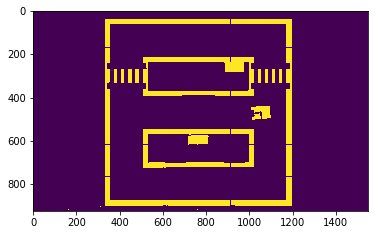

21


In [166]:
DATADIR = "/home/fizzer/.gazebo/pictures/"

xdata = []
xdatabin =[]


path = os.path.join(DATADIR)  # create path to dogs and cats
for img in os.listdir(path):  # iterate over each image per dogs and cats
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # convert to array
    plt.imshow(img_array)
    (thesh, binary_img_array) = cv2.threshold(img_array, 245, 255, cv2.THRESH_BINARY)
#     plt.imshow(img_array)
#     plt.show()
#     plt.imshow(binary_img_array)
#     plt.show()
    xdata.append(img_array)
    xdatabin.append(binary_img_array)   
plt.imshow(xdatabin[3])
plt.show()

img_map = xdatabin[3]
#now we want to crop based on outside white line

print(len(xdata))



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(924, 1549)


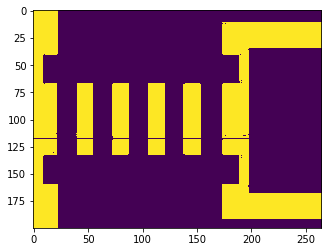

255
1549


In [34]:
print(img_map)
#to find value of x on the left boundary:
leftx = 0
print(img_map.shape)
img_1 = img_map[200:400, 335:600]
plt.imshow(img_1)
plt.show()
print(img_1[0][0])
print(img_map.shape[1])

In [51]:
leftx = 0
i = 0
while (i < img_map.shape[1]):
    if (img_map[500][i] >0):
        xleft = i
        break
    i+=1
print(xleft)

#to find xright

j = img_map.shape[1] - 1
xright = 0
while (j > 0):
    if(img_map[500][j] >0):
        xright = j
        break
    j-=1
print(xright)

#to find ytop
i = 0
while (i < img_map.shape[0]):
    if (img_map[i][500] >0):
        ytop= i
        break
    i+=1
print(ytop)


#to find ybottom
j = img_map.shape[0] - 1
while (j > 0):
    if(img_map[j][500] >0):
        ybottom = j-1
        break
    j-=1
print(ybottom)


333
1195
35
897


In [167]:
array_cropped = []

for x in xdata:
    xcropped = x[ytop:ybottom, xleft:xright]
    array_cropped.append(xcropped)
#     plt.imshow(xcropped)
#     plt.show()
print(xcropped.shape)

(862, 862)


In [164]:
R = np.matrix(([-1,-0],[0,1]))
print(R)

[[-1  0]
 [ 0  1]]


In [81]:
x = np.matrix(([2.5,2.5]))
x1 = x*R
neg = np.matrix(([-1,0],[0,-1]))
print(x1)
x2 = x1*neg
print(x2)
x3 = x*R*neg
print(x3)
x4 = x3 +2.5
print(x4)
x5 = x4*(863/5)
print(x5)

x6 = ((x*R*neg) +2.5)*(863/5)
print(x6)

i = np.matrix(([-2.5,-2.5]))
i1 = ((i*R*neg) +2.5)*(863/5)
print(i1)

[[-2.5  2.5]]
[[ 2.5 -2.5]]
[[ 2.5 -2.5]]
[[5. 0.]]
[[863.   0.]]
[[863.   0.]]
[[  0. 863.]]


In [160]:
x = np.matrix(([2.5, -2.5]))
x1 = -(x)
R = -np.matrix(([0,-1],[-1,0]))
flip = np.matrix(([0,1],[1,0]))
x2 = (x1*R)
print(x2)
x3 = (x2 +2.9)*(863/5.8)
print(x3)


[[ 2.5 -2.5]]
[[803.48275862  59.51724138]]


In [161]:
xcoord = int(x3.A1[0])
ycoord = int(x3.A1[1]) 
print(xcoord)
print(ycoord)

803
59


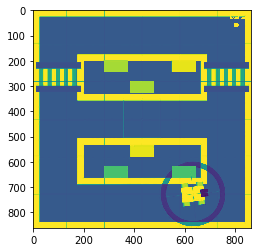

In [168]:
cv2.circle(xcropped, (xcoord, ycoord),10, (255,255,255), -1)
cv2.putText(xcropped, "location", (xcoord - 25, ycoord-25), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255, 255, 255), 2)

plt.imshow(xcropped)
plt.show()